In [3]:
import pandas as pd      
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

import warnings
warnings.filterwarnings('ignore')


In [4]:
from PIL import Image

In [5]:
#pip list

In [6]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [7]:
#pip install streamlit==1.10.0

In [8]:
 #pip install scikit-learn==1.0.2

In [9]:
#pip install seaborn

In [10]:
df = pd.read_csv("final_scout_not_dummy2.csv")

## Exploring Data

In [11]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,...,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,2.0,...,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,1.0,...,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,"Alloy wheels, Voice Control",7.0,3.0,1.0,...,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,1.0,...,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,1.0,...,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [13]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32092.436526,5.937268,1.389591,1.042869,88.493746,0.247156,1428.657364,1337.675467,4.824329,117.783110
std,7377.200813,36982.838757,0.704943,1.121355,0.339241,26.671943,0.431372,275.852413,199.672043,0.887890,18.022786
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000,45.000000
25%,12850.000000,1913.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.000000,104.000000
50%,16900.000000,20410.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000,117.000000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000,129.000000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000,253.000000


In [14]:
df.describe(include="object")

,make_model,body_type,Type,Fuel,Extras,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
count,15909,15909,15909,15909,15909,15909,15909,15909,15909,15909,15909,15909
unique,8,8,5,3,659,3,2,3,3,3,2,3
top,Audi A3,Sedans,Used,Benzine,Alloy wheels,Metallic,Cloth,Manual,front,Standard,Plus,Safety Premium Package
freq,3093,8000,11090,8548,5782,15240,12231,8148,15701,10778,10803,14612


In [15]:
df.shape

(15909, 23)

In [16]:
df.isnull().sum().any()

False

In [17]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Extras',
       'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb', 'CO2_Emission',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [18]:
df.corr()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.399443,0.530563,-0.473689,-0.144672,0.696532,0.008508,0.282075,0.468264,0.301448,0.347668
km,-0.399443,1.000000,-0.033087,0.758370,0.157039,0.004170,-0.049485,0.306792,0.147246,-0.345228,-0.227640
Gears,0.530563,-0.033087,1.000000,-0.064507,-0.036594,0.449680,-0.011026,0.339431,0.334002,0.011357,0.106674
age,-0.473689,0.758370,-0.064507,1.000000,0.316166,-0.083334,-0.045467,0.215304,0.065081,-0.371941,-0.288236
Previous_Owners,-0.144672,0.157039,-0.036594,0.316166,1.000000,-0.022535,0.019519,0.027961,0.003460,-0.022799,-0.030866
hp_kW,0.696532,0.004170,0.449680,-0.083334,-0.022535,1.000000,0.036740,0.597708,0.638395,0.403492,0.522772
Inspection_new,0.008508,-0.049485,-0.011026,-0.045467,0.019519,0.036740,1.000000,-0.025975,-0.035456,0.154669,0.134247
Displacement_cc,0.282075,0.306792,0.339431,0.215304,0.027961,0.597708,-0.025975,1.000000,0.563594,0.004314,0.288515
Weight_kg,0.468264,0.147246,0.334002,0.065081,0.003460,0.638395,-0.035456,0.563594,1.000000,0.105840,0.298414
cons_comb,0.301448,-0.345228,0.011357,-0.371941,-0.022799,0.403492,0.154669,0.004314,0.105840,1.000000,0.896209


In [19]:
import seaborn as sns

<AxesSubplot: >

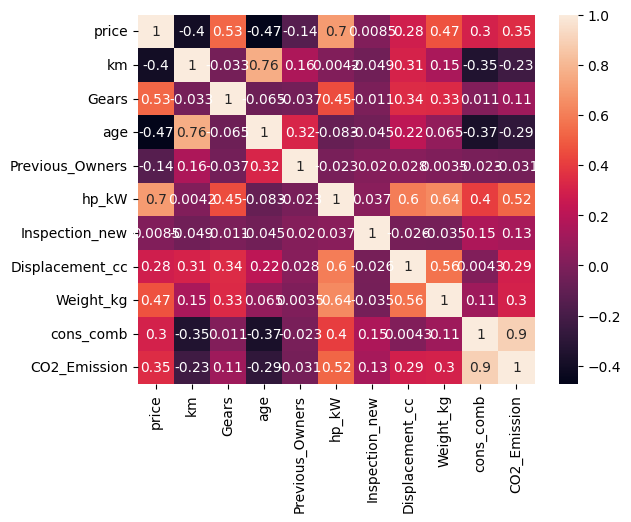

In [20]:
sns.heatmap(df.corr(), annot=True)

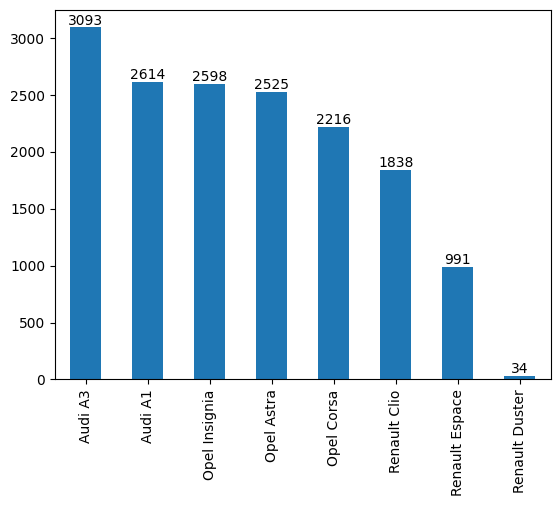

In [21]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

In [22]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [23]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,...,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package


In [24]:
df.drop(index=[2614], inplace =True)

In [25]:
df.make_model.unique()


array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [26]:
df[df["make_model"]== "Audi A1"]["price"]


0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [27]:
df.age.nunique()

4

In [28]:
df.hp_kW.nunique()

77

In [29]:
df.km.nunique()

6689

In [30]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [31]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [32]:
df.Fuel.unique()

array(['Diesel', 'Benzine', 'LPG/CNG'], dtype=object)

In [33]:
df.Comfort_Convenience_Package.unique()

array(['Premium', 'Standard', 'Premium Plus'], dtype=object)

In [34]:
df.price.nunique()

2950

In [35]:
X_list=['age', 'hp_kW', 'km', 'Gearing_Type', 'make_model', 'Fuel', 'Comfort_Convenience_Package']

In [36]:
X=df[X_list]
y=df['price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
X.sample(3)

,age,hp_kW,km,Gearing_Type,make_model,Fuel,Comfort_Convenience_Package
14867,0.0,56.0,1.000000,Manual,Renault Clio,Benzine,Standard
12552,0.0,155.0,1647.362609,Automatic,Opel Insignia,Diesel,Premium
7723,0.0,110.0,6200.000000,Automatic,Opel Astra,Benzine,Premium


In [39]:
from sklearn.compose import make_column_transformer

In [40]:
from sklearn.preprocessing import OrdinalEncoder


In [41]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model', 'Fuel', 'Comfort_Convenience_Package'], dtype='object')

In [42]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough') 

In [43]:
X_train=column_trans.fit_transform(X_train)

In [44]:
X_test=column_trans.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = rfr_model.predict(X_test)

In [47]:
eval_metrics(y_test,y_pred)

 r2_score: 0.934548236365817 
 mae: 1133.7612976264124 
 mse: 3561139.3720311625 
 rmse: 1887.0981352412923


In [48]:
import pickle
pickle.dump(rfr_model, open('rfr_model_new', 'wb'))

In [49]:
pickle.dump(column_trans, open('transformer', 'wb'))

In [50]:
auto_model = pickle.load(open('rfr_model_new', 'rb'))

In [51]:
auto_transformer = pickle.load(open('transformer', 'rb'))

In [52]:
columns=list(X.columns)
columns

['age',
 'hp_kW',
 'km',
 'Gearing_Type',
 'make_model',
 'Fuel',
 'Comfort_Convenience_Package']

In [53]:
my_dict = {
    "age": 2,
    "hp_kW": 105,
    "km": 100000,
    "Gearing_Type":"Automatic",
    "make_model": 'Audi A3',
    'Fuel':'Diesel',
    'Comfort_Convenience_Package':'Premium'
}

In [54]:
df = pd.DataFrame([my_dict])

In [55]:
df.head()


,age,hp_kW,km,Gearing_Type,make_model,Fuel,Comfort_Convenience_Package
0,2,105,100000,Automatic,Audi A3,Diesel,Premium


In [56]:
df2 = auto_transformer.transform(df)

In [57]:
pd.Series(df2[0])

0         0.0
1         1.0
2         1.0
3         0.0
4         2.0
5       105.0
6    100000.0
dtype: float64

In [58]:
prediction = rfr_model.predict(df2)
print(prediction)

[18917.26]


In [59]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €18917. 
